In [1]:
#import necessary packages
import pandas as pd

In [2]:
#create a dataframe named df1 with the ZILLOW_DATA.csv
df1=pd.read_csv('ZILLOW_DATA.csv')

In [3]:
#finding the shape of df1
shape = df1.shape
shape

(140031799, 4)

In [4]:
# Get the column names as a list of df1
columns_list = df1.columns.tolist()
columns_list

['indicator_id', 'region_id', 'date', 'value']

In [5]:
# Find the row with the latest date
latest_date_row = df1[df1['date'] == df1['date'].max()]
print(latest_date_row)

         indicator_id  region_id        date     value
45988286         ISAW     102001  2023-08-05  684174.0
45988289         ISAW     394913  2023-08-05   33641.0
45988292         ISAW     753899  2023-08-05   11020.0
45988295         ISAW     394463  2023-08-05   15772.0
45988298         ISAW     394514  2023-08-05   16794.0
...               ...        ...         ...       ...
46110578         LSSW     753929  2023-08-05  149375.0
46110583         LSSW     394743  2023-08-05  427000.0
46110587         LSSW     753874  2023-08-05  361188.0
46110592         LSSW     395188  2023-08-05  104250.0
46110596         LSSW     394767  2023-08-05  169750.0

[12548 rows x 4 columns]


In [40]:
# Convert date_column to datetime type
df1['date'] = pd.to_datetime(df1['date'])

# Define start and end dates
start_date = pd.to_datetime('2018-08-05')
end_date = pd.to_datetime('2023-08-05')

# Filter the DataFrame
five_data_df = df1[(df1['date'] >= start_date) & (df1['date'] <= end_date)]

In [41]:
five_data_df.shape

(32072684, 4)

In [8]:
#create a dataframe named df1 with the ZILLOW_REGIONS.csv
df2=pd.read_csv('ZILLOW_REGIONS.csv')

In [9]:
# Get the column names as a list
columns_list = df2.columns.tolist()
columns_list

['region_id', 'region_type', 'region']

In [10]:
#create a dataframe named df1 with the ZILLOW_INDICATORS.csv
df3=pd.read_csv('ZILLOW_INDICATORS.csv')

In [11]:
# Get the column names as a list
columns_list = df3.columns.tolist()
columns_list

['indicator_id', 'indicator', 'category']

In [12]:
#merge
merged_df = pd.merge(ten_data_df, df2, on='region_id', how='inner')
merged_df = pd.merge(merged_df, df3, on='indicator_id', how='inner')

In [13]:
merged_df.head()

,indicator_id,region_id,date,value,region_type,region,indicator,category
0,ZATT,3101,2018-08-31,1154447.0,county,Los Angeles County; CA; Los Angeles-Long Beach...,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZATT,3101,2018-09-30,1156435.0,county,Los Angeles County; CA; Los Angeles-Long Beach...,ZHVI All Homes- Top Tier Time Series ($),Home values
2,ZATT,3101,2018-10-31,1157021.0,county,Los Angeles County; CA; Los Angeles-Long Beach...,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZATT,3101,2018-11-30,1157891.0,county,Los Angeles County; CA; Los Angeles-Long Beach...,ZHVI All Homes- Top Tier Time Series ($),Home values
4,ZATT,3101,2018-12-31,1156054.0,county,Los Angeles County; CA; Los Angeles-Long Beach...,ZHVI All Homes- Top Tier Time Series ($),Home values


In [14]:
merged_df.shape

(32072684, 8)

In [15]:
# Save the DataFrame to a CSV file
merged_df.to_csv('merged_df_five.csv', index=False)

In [16]:
unique_values = merged_df['indicator'].unique()
unique_values

array(['ZHVI All Homes- Top Tier Time Series ($)',
       'ZHVI Single-Family Homes Time Series ($)',
       'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)',
       'ZHVI Condo/Co-op Time Series ($)',
       'ZHVI All Homes- Bottom Tier Time Series ($)',
       'ZHVI 5+ Bedroom Time Series ($)',
       'ZHVI 2-Bedroom Time Series ($)', 'ZHVI 3-Bedroom Time Series ($)',
       'ZHVI 1-Bedroom Time Series ($)', 'ZHVI 4-Bedroom Time Series ($)',
       'ZORI (Smoothed): All Homes Plus Multifamily Time Series ($)',
       'ZORI (Smoothed, Seasonally Adjusted): All Homes Plus Multifamily Time Series ($)',
       'For-Sale Inventory (Smooth, All Homes, Weekly View)',
       'Median Sale Price (Smooth, All Homes, Weekly View)',
       'For-Sale Inventory (Raw, All Homes, Monthly)',
       'Share of Listings With a Price Cut (Raw, SFR Only, Monthly)',
       'Share of Listings With a Price Cut (Smooth, SFR Only, Monthly)',
       'Mean Days to Pending (Smooth, All Homes, Monthly)',
       

In [20]:
merged_df2=merged_df.query("category == 'Homevalue'")

In [21]:
merged_df2.shape

(30400000, 8)

In [22]:
merged_df3=merged_df.query("category == 'Rentals'")

In [23]:
merged_df3.shape

(290958, 8)

In [24]:
merged_df4=merged_df.query("category == 'Inventory and sales'")

In [25]:
merged_df4.shape

(1381726, 8)

In [28]:
#merged_df5=merged_df2.query("indicator_id == 'Z1BR','Z2BR','Z3BR','Z4B4','Z5BR'")
list =['Z1BR','Z2BR','Z3BR','Z4B4','Z5BR']
df5 = merged_df2[merged_df2.indicator_id.isin(list)]
#print(df5)

In [29]:
df5.shape

(12610353, 8)

In [30]:
df5.head()

,indicator_id,region_id,date,value,region_type,region,indicator,category
14124994,Z5BR,3101,2020-06-30,1203494.0,county,Los Angeles County; CA; Los Angeles-Long Beach...,ZHVI 5+ Bedroom Time Series ($),Home values
14124995,Z5BR,3101,2020-04-30,1195185.0,county,Los Angeles County; CA; Los Angeles-Long Beach...,ZHVI 5+ Bedroom Time Series ($),Home values
14124996,Z5BR,3101,2020-03-31,1187719.0,county,Los Angeles County; CA; Los Angeles-Long Beach...,ZHVI 5+ Bedroom Time Series ($),Home values
14124997,Z5BR,3101,2020-10-31,1246664.0,county,Los Angeles County; CA; Los Angeles-Long Beach...,ZHVI 5+ Bedroom Time Series ($),Home values
14124998,Z5BR,3101,2020-08-31,1209135.0,county,Los Angeles County; CA; Los Angeles-Long Beach...,ZHVI 5+ Bedroom Time Series ($),Home values


In [39]:
df5.to_csv('df5_final.csv', index=False)

## Check for Duplicates

In [43]:
duplicate = df5.duplicated().sum()
print("Number of Duplicate Rows: ",duplicate)

Number of Duplicate Rows:  0


## Check for Missing Values

In [51]:
import numpy as np
pd.DataFrame({'Missing Count': df5.isnull().sum()})

,Missing Count
indicator_id,0
region_id,0
date,0
value,0
region_type,0
region,0
indicator,0
category,0


## Data Quality Report

In [52]:
# Get the number of rows and columns
num_rows, num_columns = df5.shape

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 12610353
Number of columns: 8


In [48]:
pd.DataFrame({'Data Type': df5.dtypes})

,Data Type
indicator_id,object
region_id,int64
date,datetime64[ns]
value,float64
region_type,object
region,object
indicator,object
category,object


In [58]:
# Set the display format to show values in millions
pd.options.display.float_format = '{:.2f}'.format

# Generate a summary for the 'Age' column
summary =  df5['value'].describe()

# Print the summary for the 'Age' column
pd.DataFrame({'Summary': summary})

,Summary
count,12610353.00
mean,306390.45
std,407225.02
min,8028.00
25%,120627.00
50%,202290.00
75%,351807.00
max,32731812.00


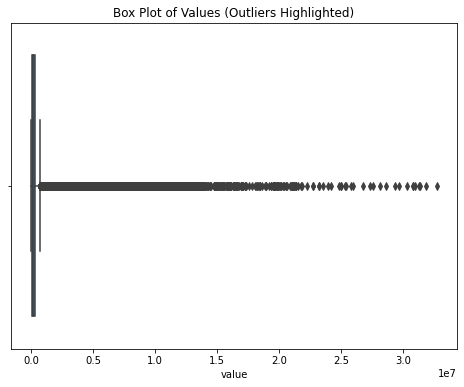

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='value', data=df5)
plt.title('Box Plot of Values (Outliers Highlighted)')
plt.show()

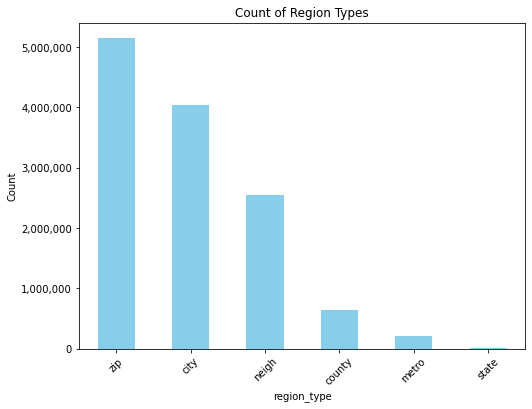

In [67]:
from matplotlib.ticker import FuncFormatter
# Group the data by 'Region Type' and count occurrences
region_type_counts = df5['region_type'].value_counts()

# Create a bar plot to visualize the counts
plt.figure(figsize=(8, 6))

# Custom formatter to display counts as integers without scientific notation
def format_func(value, tick_number):
    return f'{int(value):,}'

ax = region_type_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Region Types')
plt.xlabel('region_type')
plt.ylabel('Count')

# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

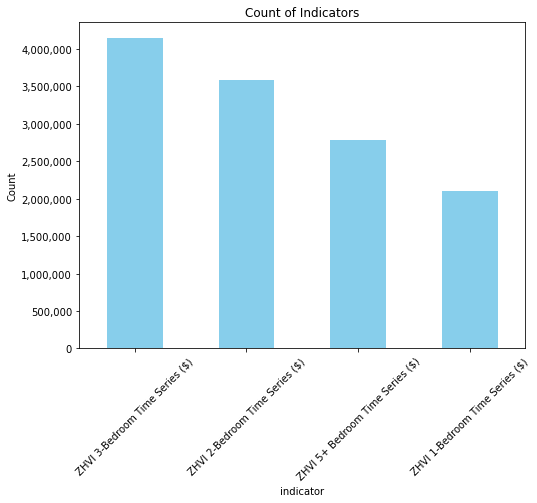

In [68]:
# Group the data by 'Indicator' and count occurrences
indicator_counts = df5['indicator'].value_counts()

# Create a bar plot to visualize the counts
plt.figure(figsize=(8, 6))

# Custom formatter to display counts as integers without scientific notation
def format_func(value, tick_number):
    return f'{int(value):,}'

ax = indicator_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Indicators')
plt.xlabel('indicator')
plt.ylabel('Count')

# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()